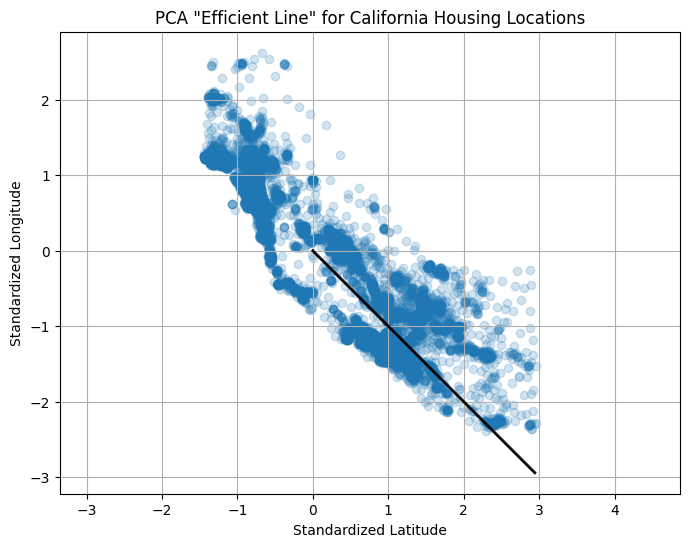

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the California housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
# Assuming 'Latitude' and 'Longitude' represent the geographical coordinates
X = df[['Latitude', 'Longitude']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# Get the PCA components (i.e., the direction vector of the "efficient line")
components = pca.components_[0]
mean = pca.mean_

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)  # Scale vector for visualization
    plt.plot([mean[0], mean[0]+v[0]], [mean[1], mean[1]+v[1]], '-k', lw=2)
plt.xlabel('Standardized Latitude')
plt.ylabel('Standardized Longitude')
plt.title('PCA "Efficient Line" for California Housing Locations')
plt.grid(True)
plt.axis('equal')
plt.show()


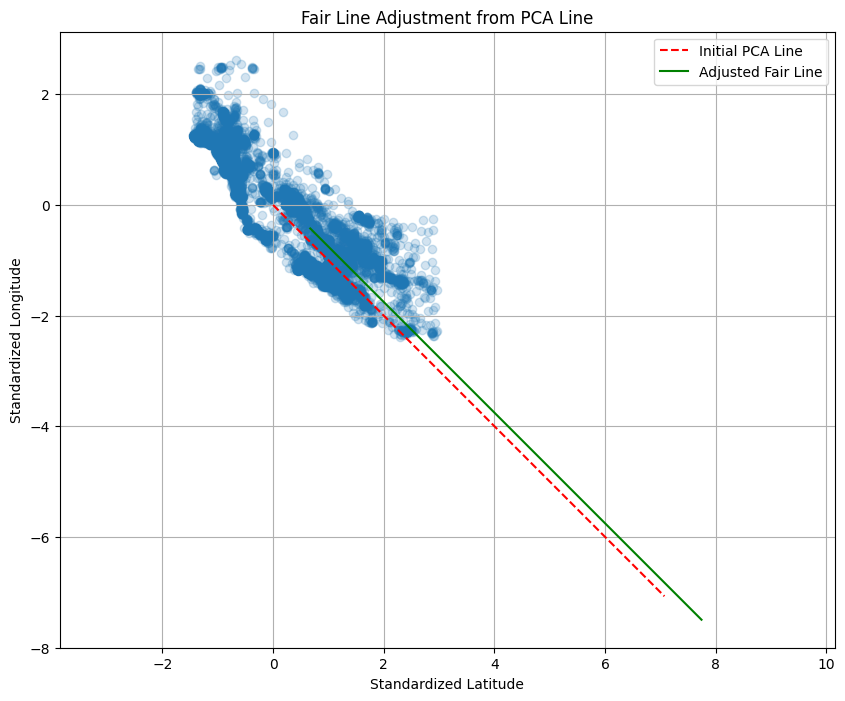

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the data again
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
X = df[['Latitude', 'Longitude']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initial guess for the line using PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)
initial_line_direction = pca.components_[0]
initial_line_point = pca.mean_

# Function to calculate perpendicular distance from a point to a line
def perpendicular_distance(point, line_point, line_direction):
    # Normalize line direction for accurate distance calculation
    normalized_direction = line_direction / np.linalg.norm(line_direction)
    return np.abs(np.cross(normalized_direction, point - line_point))

# Iterative process to adjust the line
def adjust_line(X, initial_point, initial_direction, iterations=100):
    point = initial_point
    direction = initial_direction

    for _ in range(iterations):
        # Calculate all distances
        distances = np.array([perpendicular_distance(x, point, direction) for x in X])

        # Find the point with the maximum distance
        max_dist_point = X[distances.argmax()]

        # Adjust the line by setting a new point to be the midpoint between the previous point and the furthest point
        point = (point + max_dist_point) / 2

        # Optionally, adjust the direction if needed (advanced, not shown here)

    return point, direction

# Adjust the line to minimize the maximum distance
fair_line_point, fair_line_direction = adjust_line(X_scaled, initial_line_point, initial_line_direction)

# Plot the initial and adjusted lines
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.2)

# Plot initial line (PCA)
plt.plot([initial_line_point[0], initial_line_point[0] + 10 * initial_line_direction[0]],
         [initial_line_point[1], initial_line_point[1] + 10 * initial_line_direction[1]], 'r--', label='Initial PCA Line')

# Plot adjusted line
plt.plot([fair_line_point[0], fair_line_point[0] + 10 * fair_line_direction[0]],
         [fair_line_point[1], fair_line_point[1] + 10 * fair_line_direction[1]], 'g-', label='Adjusted Fair Line')

plt.xlabel('Standardized Latitude')
plt.ylabel('Standardized Longitude')
plt.title('Fair Line Adjustment from PCA Line')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


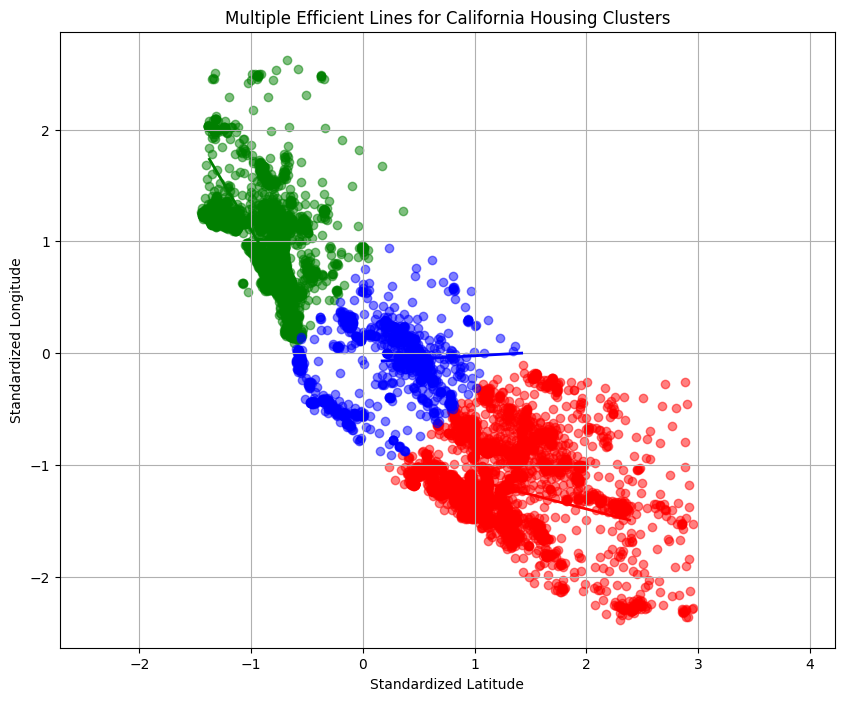

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Set the number of lines (clusters)
k = 3  # You can change this number based on your requirements

# Perform k-means clustering
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(X_scaled)

# Set up the plot
plt.figure(figsize=(10, 8))

# Colors for the clusters
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']

for i in range(k):
    # Get the points for the current cluster
    cluster_points = X_scaled[clusters == i]

    # Perform PCA on the cluster to find the direction of the "efficient" line
    pca = PCA(n_components=1)
    pca.fit(cluster_points)

    # Get the PCA components (i.e., the direction vector of the "efficient" line)
    components = pca.components_[0]
    mean = pca.mean_

    # Plot the points of the cluster
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], alpha=0.5)

    # Plot the "efficient" line for the cluster
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)  # Scale vector for visualization
        plt.plot([mean[0], mean[0]+v[0]], [mean[1], mean[1]+v[1]], colors[i]+'-', lw=2)

# Add labels and title
plt.xlabel('Standardized Latitude')
plt.ylabel('Standardized Longitude')
plt.title('Multiple Efficient Lines for California Housing Clusters')
plt.grid(True)
plt.axis('equal')
plt.show()
